In [1]:
import seaborn as sns
import pandas as pd
import os

In [2]:
fifa = pd.read_csv("fifa.csv")

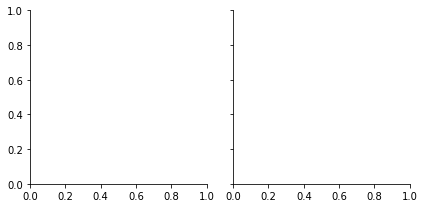

In [3]:
df = fifa[fifa['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col="Position")

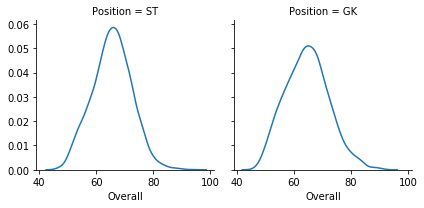

In [4]:
df = fifa[fifa['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col="Position")
g.map(sns.kdeplot, "Overall")

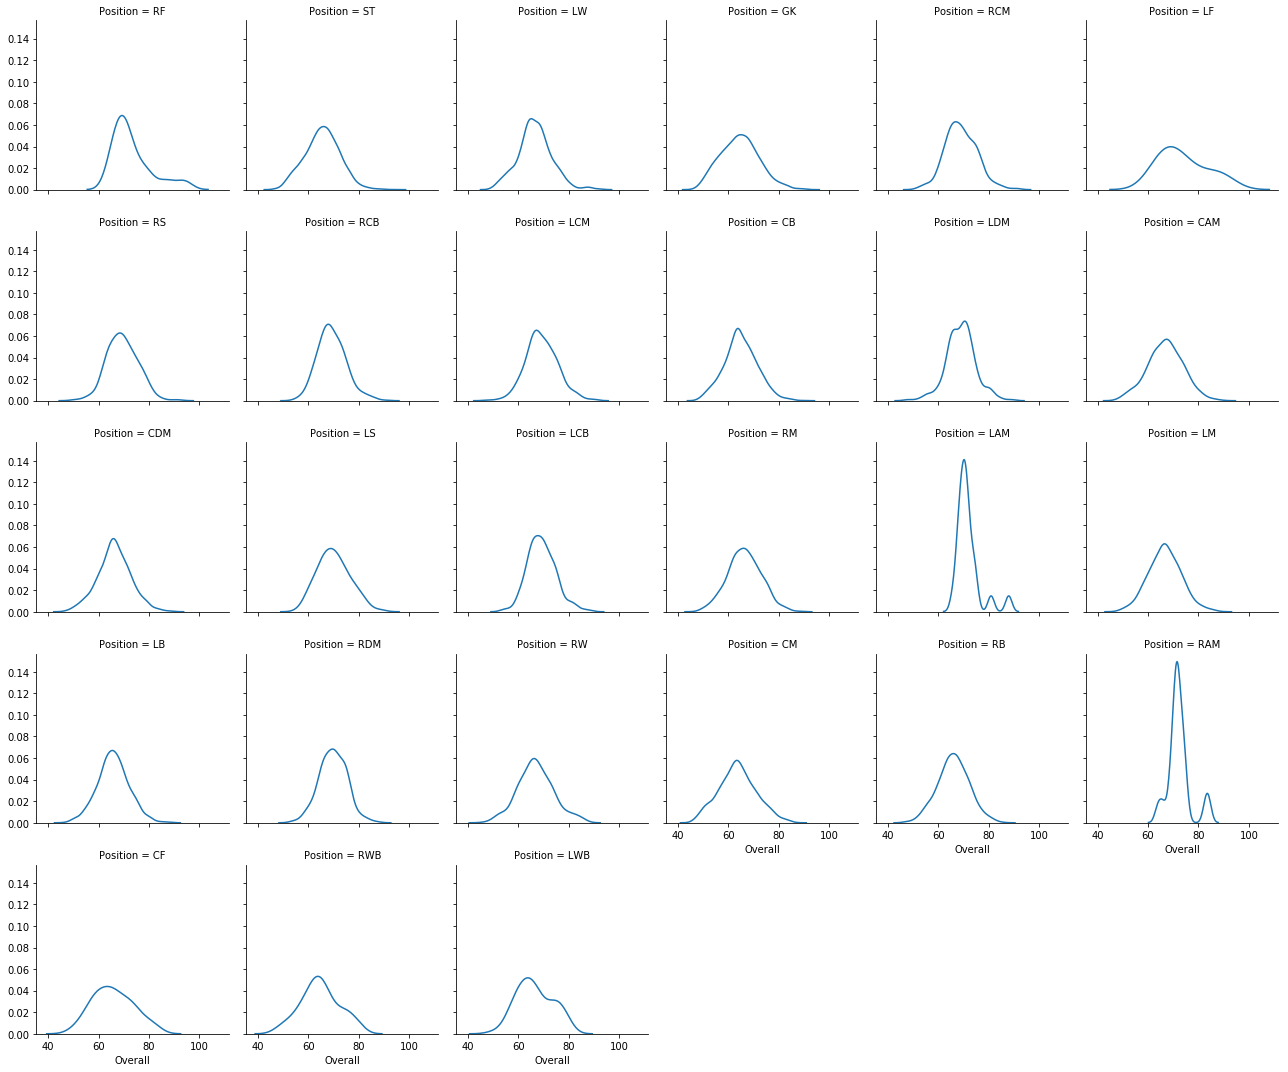

In [46]:
df = fifa

g = sns.FacetGrid(df, col="Position", col_wrap=6)
g.map(sns.kdeplot, "Overall")

In [1]:
import pandas as pd

In [2]:
fifa = pd.read_csv("fifa.csv")

In [5]:
fifa[['Overall', 'Value', 'Wage', 'International Reputation', 'Height']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 5 columns):
Overall                     18207 non-null int64
Value                       18207 non-null object
Wage                        18207 non-null object
International Reputation    18159 non-null float64
Height                      18159 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 711.3+ KB


In [ ]:
 df[cols] = df[cols].applymap(np.int64)

In [9]:
import numpy as np

In [ ]:
df[col] = df[col].astype('int64')


In [ ]:
pd.to_numeric

Age, Potential rating, current rating study of all players:
    Now let's look at how age, potential rating and current overall rating correlated with each other:

Text(0.5,1,'Average Rating by Age')

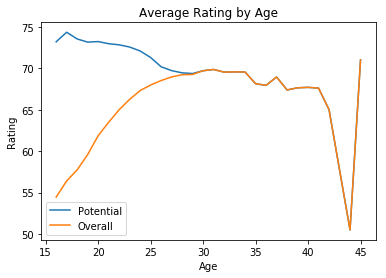

In [19]:
df_p = fifa.groupby(['Age'])['Potential'].mean()
df_o = fifa.groupby(['Age'])['Overall'].mean()

df_summary = pd.concat([df_p, df_o], axis=1)

ax = df_summary.plot()
ax.set_ylabel('Rating')
ax.set_title('Average Rating by Age')

We can see that players have much more potential to grow at their younger age, and grow very slow after around age 28 (average view among all players).

Seaborn's lmplot is a 2D scatterplot with an optional overlaid regression line. This is useful for comparing numeric variables.
The horizontal position (x-value) tracks the Value of the player (how well they are paid). The vertical position (y-value) tracks the Overall score of the player across all attributes. And the color (the hue parameter) tracks which of the three categories of interest the player the point represents is in.
Looking at this scatter plot we see the same overplotting issue we saw in previous sections. But we no longer have an easy solution, like using a hex plot, because color doesn't make sense in that setting.

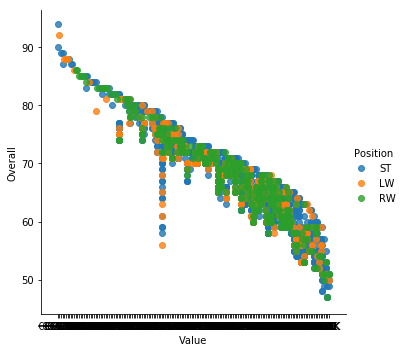

In [27]:
import seaborn as sns

sns.lmplot(x='Value', y='Overall', hue='Position', 
           data=fifa.loc[fifa['Position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False)

Lets add shape into the same plot:

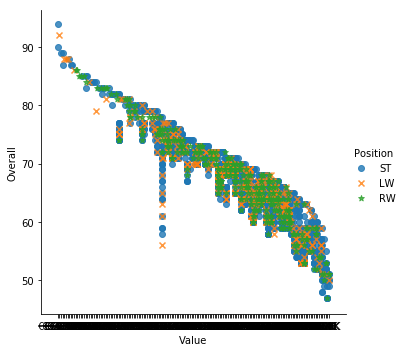

In [29]:
sns.lmplot(x='Value', y='Overall', markers=['o', 'x', '*'], hue='Position',
           data=fifa.loc[fifa['Position'].isin(['ST', 'RW', 'LW'])],
           fit_reg=False
          )

Grouped Boxplot::
Suppose we're interested in the following question: do Strikers score higher on "Aggression" than Goalkeepers do?

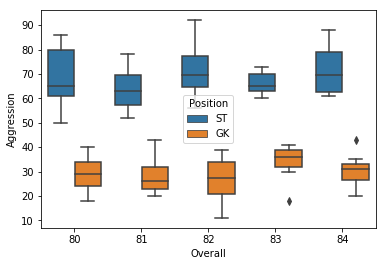

In [47]:
f = (fifa
         .loc[fifa['Position'].isin(['ST', 'GK'])]
         .loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
    )
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)

sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f)

As you can see, this plot demonstrates conclusively that within our datasets goalkeepers (at least, those with an overall score between 80 and 85) have much lower Aggression scores than Strikers do.

In this plot, the horizontal axis encodes the Overall score, the vertical axis encodes the Aggression score, and the grouping encodes the Position.

In [34]:
fifa.iloc[:, 12:17].head(1)

,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate
0,Left,5.0,4.0,4.0,Medium/ Medium
